# STAT 345 Prelim Exam One -- Practice Exam Solutions

You have 48 hours to do this exam, but it should only take $\lesssim$2 hours. You may use any books or notes you like, and any electronic devices with communication capabilities
switched off (airplane mode).  You may find it useful to use the wrapper [wilcoxdists.py](wilcoxdists.py) as well as the functionality of the Jupyter notebook.  You should not communicate with anyone or look anything up on the internet from the time you start the exam to the time you submit it.

Some problems contain boxes ($\boxed{\color{brown}{????}}$) into which you should place your final
answer. Express all numerical results to at least three decimal places.

The exam contains three problems worth a total of 45 points. Try not to
spend too much time on any one problem. The weight of each part of each
problem is listed, as is the total weight for each problem. Later parts
of a problem may or may not depend on some, but not all, of the previous
parts.

**Show your work!**

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## 1. Comparing Ratings (15 points total)

Two brands (Airblaster and Coolmaster) of table fan receive ratings on a scale of $1$ (very bad) to $5$ (very good).  Sixty people rate the Airblaster fan and give it the following ratings:

In [3]:
abrat_i = np.array([1, 5, 2, 5, 5, 3, 4, 3, 2, 5, 1, 5, 2, 1, 1, 5, 2, 1, 4, 1,
                    1, 1, 5, 4, 1, 4, 3, 1, 1, 2, 1, 5, 4, 5, 3, 5, 1, 1, 1, 1,
                    4, 2, 5, 5, 5, 5, 5, 1, 3, 3, 2, 4, 1, 1, 1, 1, 1, 2, 5, 2])

Sixty *other* people rate the Coolmaster fan and give it the following ratings:

In [4]:
cmrat_j = np.array([1, 5, 3, 5, 4, 2, 4, 3, 1, 2, 4, 2, 1, 3, 5, 1, 1, 5, 4, 1,
                    5, 1, 5, 4, 3, 3, 3, 1, 4, 3, 4, 5, 1, 4, 3, 5, 4, 4, 4, 4,
                    3, 5, 5, 5, 1, 5, 5, 5, 2, 4, 1, 3, 5, 5, 1, 4, 4, 5, 4, 5])

In [5]:
stats.mannwhitneyu(abrat_i,cmrat_j)

MannwhitneyuResult(statistic=1438.0, pvalue=0.050824067222131536)

**(a)** \[6pts\] Define, construct, and evaluate the standard rank-based statistic to test for evidence of a preference for one brand or the other.

<font color="brown">Even though the number of ratings is the same for each brand, this is *not* a matched pairs problem, since a different group of people rated each fan.  Thus the appropriate test is the Wilcoxon rank sum test, or equivalently the Mann-Whitney U test, with $m=n=60$.</font>

In [6]:
n = len(abrat_i)
m = len(cmrat_j)
n, m

(60, 60)

<font color="brown">First we give the definition of the rank sum statistic $W_x$:</font>

$$\hbox{Definition of statistic:} \boxed{\color{brown}{\hbox{Sum of the ranks of the Airmaster ratings within the combined list.}}}$$

In [7]:
rat_r = np.concatenate((abrat_i,cmrat_j))
R_r = stats.rankdata(rat_r)
R_r

array([ 17.5, 103.5,  41. , 103.5, 103.5,  55.5,  75. ,  55.5,  41. ,
       103.5,  17.5, 103.5,  41. ,  17.5,  17.5, 103.5,  41. ,  17.5,
        75. ,  17.5,  17.5,  17.5, 103.5,  75. ,  17.5,  75. ,  55.5,
        17.5,  17.5,  41. ,  17.5, 103.5,  75. , 103.5,  55.5, 103.5,
        17.5,  17.5,  17.5,  17.5,  75. ,  41. , 103.5, 103.5, 103.5,
       103.5, 103.5,  17.5,  55.5,  55.5,  41. ,  75. ,  17.5,  17.5,
        17.5,  17.5,  17.5,  41. , 103.5,  41. ,  17.5, 103.5,  55.5,
       103.5,  75. ,  41. ,  75. ,  55.5,  17.5,  41. ,  75. ,  41. ,
        17.5,  55.5, 103.5,  17.5,  17.5, 103.5,  75. ,  17.5, 103.5,
        17.5, 103.5,  75. ,  55.5,  55.5,  55.5,  17.5,  75. ,  55.5,
        75. , 103.5,  17.5,  75. ,  55.5, 103.5,  75. ,  75. ,  75. ,
        75. ,  55.5, 103.5, 103.5, 103.5,  17.5, 103.5, 103.5, 103.5,
        41. ,  75. ,  17.5,  55.5, 103.5, 103.5,  17.5,  75. ,  75. ,
       103.5,  75. , 103.5])

<font color="brown">There are of course a lot of ties in the combined list.  The first 60 elements in the list are the Airblaster ratings and the last 60 are for Coolmaster:</font>

In [8]:
abR_i = R_r[:n]
cmR_j = R_r[n:]
abR_i, cmR_j, len(abR_i), len(cmR_j)

(array([ 17.5, 103.5,  41. , 103.5, 103.5,  55.5,  75. ,  55.5,  41. ,
        103.5,  17.5, 103.5,  41. ,  17.5,  17.5, 103.5,  41. ,  17.5,
         75. ,  17.5,  17.5,  17.5, 103.5,  75. ,  17.5,  75. ,  55.5,
         17.5,  17.5,  41. ,  17.5, 103.5,  75. , 103.5,  55.5, 103.5,
         17.5,  17.5,  17.5,  17.5,  75. ,  41. , 103.5, 103.5, 103.5,
        103.5, 103.5,  17.5,  55.5,  55.5,  41. ,  75. ,  17.5,  17.5,
         17.5,  17.5,  17.5,  41. , 103.5,  41. ]),
 array([ 17.5, 103.5,  55.5, 103.5,  75. ,  41. ,  75. ,  55.5,  17.5,
         41. ,  75. ,  41. ,  17.5,  55.5, 103.5,  17.5,  17.5, 103.5,
         75. ,  17.5, 103.5,  17.5, 103.5,  75. ,  55.5,  55.5,  55.5,
         17.5,  75. ,  55.5,  75. , 103.5,  17.5,  75. ,  55.5, 103.5,
         75. ,  75. ,  75. ,  75. ,  55.5, 103.5, 103.5, 103.5,  17.5,
        103.5, 103.5, 103.5,  41. ,  75. ,  17.5,  55.5, 103.5, 103.5,
         17.5,  75. ,  75. , 103.5,  75. , 103.5]),
 60,
 60)

In [9]:
Wab = np.sum(abR_i); Wab

3268.0

$$\hbox{Statistic Value:} \boxed{\color{brown}{3268}}$$

<font color="brown">If we had defined the statistic the other way, as the sum of the Coolmaster ranks, we would have got $\frac{120(120+1)}{2}-3268=3992$</font>

In [10]:
Wcm = np.sum(cmR_j); Wcm, (n+m)*(n+m+1)/2 - Wab

(3992.0, 3992.0)

<font color="brown">We could instead have considered the Mann-Whitney $U$ statistic, which is the number of the $mn$ rating pairs in which the Airmaster rating is higher, plus one-half the number of rating pairs in which the ratings are equal:</font>

In [11]:
Nab = np.sum(abrat_i[:,None]  > cmrat_j[None,:])
Neq = np.sum(abrat_i[:,None] == cmrat_j[None,:])
Ncm = np.sum(abrat_i[:,None]  < cmrat_j[None,:])
print("Out of %dx%d=%d pairs, %d have AB rated higher, %d are equal, and %d have CM rated higher"
      % (n,m,n*m,Nab,Neq,Ncm))

Out of 60x60=3600 pairs, 1058 have AB rated higher, 760 are equal, and 1782 have CM rated higher


In [12]:
Uab = Nab + 0.5*Neq
Uab

1438.0

<font color="brown">Note that as usual $U_x=W_x-n(n+1)/2$:</font>

In [13]:
Wab - n*(n+1)/2

1438.0

<font color="brown">Finally, if we'd calculated the Mann-Whitney statistic the other way around, we would have got $U_y=nm-U_x=W_y-m(m+1)/2$.</font>

In [14]:
Ucm = Ncm + 0.5*Neq
Ucm, n*m-Uab, Wcm - m*(m+1)/2

(2162.0, 2162.0, 2162.0)

**(b)** \[6pts\] If the two fans were equally preferred, what would the expectation value and standard deviation of your statistic be for a data set like this one?

<font color="brown">For the rank-sum statistic, the expectation value would be
$n(m+n+1)/2$</font>

In [15]:
mu = n*(m+n+1)/2; mu

3630.0

$$\hbox{Expectation Value} = \boxed{\color{brown}{3630}}$$

<font color="brown">This would also be the case if we'd defined it the other way around, because in this case $m=n$, so $m(m+n+1)/2=n(m+n+1)/2.</font>

In [16]:
m*(n+m+1)/2

3630.0

<font color="brown">Note that this is also one-half of the sum of all the ranks:</font>

In [17]:
0.5 * np.sum(R_r)

3630.0

<font color="brown">For the Mann-Whitney statistic, the mean would have been $mn/2=1800$</font>

In [18]:
m*n/2

1800.0

<font color="brown">Note that this is the expectation value of the rank sum statistic minus $n(n+1)/2$ (which is he same as $m(m+1)/2$ in this problem).</font>

In [19]:
mu - n*(n+1)/2, mu - m*(m+1)/2

(1800.0, 1800.0)

<font color="brown">The simplest way to find the variance of the statistic (which is the same for all four of the possible choices of statistic) is using the actual ranks:$$\frac{nm}{(n+m)(n+m-1)}\sum_{r=1}^{n+m}
  \left(
  R_r - \frac{n+m+1}{2}
  \right)^2$$</font>

In [20]:
sigsq = n*m/((n+m)*(n+m-1)) * np.sum((R_r-(n+m+1)/2)**2); sigsq

34263.27731092437

In [21]:
sigma = np.sqrt(sigsq); sigma

185.10342328256485

$$\hbox{Standard deviation} = \boxed{\color{brown}{185.10}}$$

<font color="brown">Note that the formula that assumes no ties would give the wrong answer:</font>

In [22]:
n*m*(n+m+1)/12, np.sqrt(n*m*(n+m+1)/12)

(36300.0, 190.5255888325765)

<font color="brown">We can check, incidentally, that we get the same answer using the version of the formula in section 5.1 of Conover:</font>

In [23]:
n*m/((n+m)*(n+m-1))*np.sum(R_r**2) - n*m*(n+m+1)**2/(4*(n+m-1))

34263.27731092436

**(c)** \[3pts\] Calculate the $p$-value, according to this test, associated with the observed data.

<font color="brown">We can convert the statistic into a $z$-score
$$
z = \frac{W_x - \mu}{\sigma}
$$
which should be standard normal under the null hypothesis:
</font>

In [24]:
z = ( Wab - mu ) / sigma; z 

-1.9556634533300783

<font color="brown">Since the alternative hypothesis, that the preferences for the fans is different, is two-sided, we need the two-tailed $p$-value:</font>

In [25]:
pval = 2. * stats.norm.sf(np.abs(z)); pval

0.05050481265625759

$$\hbox{$p$-value} = \boxed{\color{brown}{0.0505}}$$

<font color="brown">We can check this result using SciPy's built-in Mann-Whitney test:</font>

In [26]:
stats.mannwhitneyu(abrat_i,cmrat_j)

MannwhitneyuResult(statistic=1438.0, pvalue=0.050824067222131536)

<font color="brown">The small difference in the exact $p$-value comes from applying a continuity correction.  Since $W_x = 3268$, the $p$-value is $P(\color{royalblue}{W_x}\le 3268|H_0)=P(\color{royalblue}{W_x}\le 3268.5|H_0)$:</font>

In [27]:
zcorr = ( Wab + 0.5 - mu ) / sigma
zcorr, 2 * stats.norm.sf(np.abs(zcorr))

(-1.9529622607149815, 0.050824067222131536)

<font color="brown">Note that since there are ties, the statistic could actually have taken on half-integer values, so it's not obvious that 0.5 is the right continuity convention, but things are approximate in this regime anyway.</font>

<font color="brown">Note that here the "exact" null distribution for the statistic would not be right, since it does not know about the ties:</font>

In [28]:
from wilcoxondists import mannwhitneycdf
2 * mannwhitneycdf(int(Uab),n,m)

0.05758621614442035

<font color="brown">In fact, it would have given a result similar to the normal approximation without the tie correction:</font>

In [29]:
2*stats.norm.sf(np.abs((Wab - mu) / np.sqrt(n*m*(n+m+1)/12)))

0.05743216827289524

## 2. Thresholds for Hypothesis Tests (10 points total)

**(a)** \[4pts\] Suppose we have a sample of size $n=90$ from a continuous distribution, and wish to test the hypothesis $H_0$ that the distribution has zero median against the hypothesis $H_1$ that it has positive median, using the sign test.  If $n^{+}$ is the number of positive values in the sample, find the threshold $n^{\text{crit}}$ such that a test which rejects $H_0$ when $n^{+}>n^{\text{crit}}$, what is the value of $n^{\text{crit}}$ such that the significance $\alpha$ of the test (i.e., the probability of making a Type I Error if $H_0$ is true) is as close as possible to $0.10$ without going over?

<font color="brown">We need the 90th percentile of the $\text{Bin}(n,\frac{1}{2})$ distribution:</font>

In [30]:
n = 90
ncrit = stats.binom(n,0.5).isf(0.10); ncrit

51.0

<font color="brown">We can check that rejecting when $n^{+}>51$ gives us $\alpha$ below $0.10$, but using $n^{+}>50$ would give us too high an $\alpha$:</font>

In [31]:
stats.binom(n,0.5).sf(51)

0.08512119752303683

In [32]:
stats.binom(n,0.5).sf(50)

0.12305322485813905

$$n^{\text{crit}} = \boxed{\color{brown}{51}}$$

**(b)** \[3pts\] Evaluate the actual significance of the test defined in part **(a)**

In [33]:
alpha = stats.binom(n,0.5).sf(ncrit); alpha

0.08512119752303683

$$\alpha = \boxed{\color{brown}{0.0851}}$$

**(c)** \[3pts\] Suppose the sample is drawn from a symmetric distribution with known standard deviation $\sigma$, and we define a test which rejects $H_0$ when $z=\frac{\overline{x}}{\sigma/\sqrt{n}}>z^{\text{crit}}$.  If we want this test to have the significance $\alpha$ calculated in part **(b)**, what is the threshold $z^{\text{crit}}$?  (The sampling distribution is not necessarily normal, but you may invoke the Central Limit Theorem.)

<font color="brown">The central limit theorem tells is that the statistic above is approximately standard normal (when $E(\color{royalblue}{X_i})=0$ and $V(\color{royalblue}{X_i}=\sigma^2$) for large $n$, so we want the $100\times(1-\alpha)$th percentile:</font>

In [34]:
zcrit = stats.norm.isf(alpha); zcrit

1.3714253644366439

$$z^{\text{crit}} = \boxed{\color{brown}{1.37}}$$

## 3 Comparison for a Logistic Sampling Distribution (20 points total)

**Note: You should do problem 2 before doing this one.**

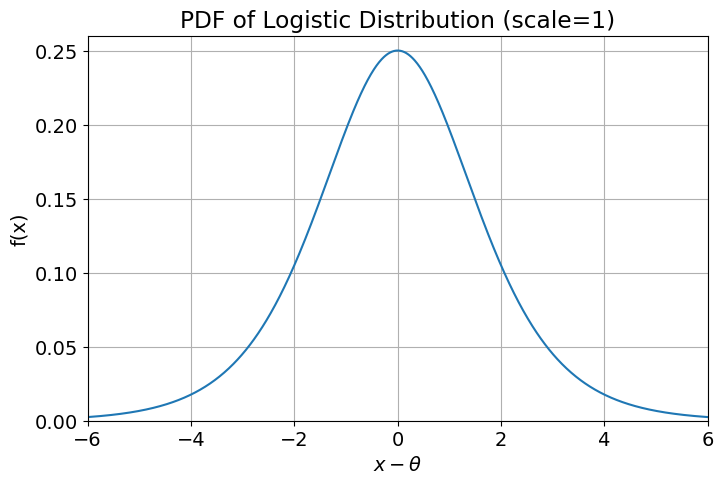

In [35]:
x_x = np.linspace(-6,6,1201)
f_x = stats.logistic.pdf(x_x)
plt.plot(x_x,f_x);
plt.xlim(-6,6);
plt.ylim(0,0.26);
plt.grid();
plt.xlabel(r'$x-\theta$');
plt.ylabel(r'f(x)');
plt.title(r'PDF of Logistic Distribution (scale=1)');

The logistic distribution has the pdf (plotted above)
$$
f(x) = \frac{e^{-(x-\theta)}}{(1+e^{-(x-\theta)})^2}
$$
and (in this form) has mean $\theta$ and standard deviation $\sigma=\pi/\sqrt{3}$.

In [36]:
stats.logistic.mean()

0.0

In [37]:
sigma = stats.logistic.std(); sigma

1.8137993642342178

In [38]:
np.pi/np.sqrt(3)

1.8137993642342178

**(a)** \[6pts\] Using either theoretical calculations or a Monte Carlo simulation, work out the power curve $\gamma_s(\theta)$ for the sign test defined in part (a) of problem 2.  (You will plot this below, so store it in an array covering $\theta=0$ to $\theta=1$ at a reasonable density of points.)

<font color="brown">If the sample is drawn from a logistic disribution with location parameter $\theta$, the distribution of the test statistic will be $\color{royalblue}{T^{+}}\sim\text{Bin}(n,p_\theta)$, where $p_{\theta}$ is the probability that a value drawn from such a logistic distribution will be positive:</font>

In [39]:
ntheta = 101
theta_t = np.linspace(0,1,ntheta)
ptheta_t = stats.logistic(loc=theta_t).sf(0)

<font color="brown">We can see that $p_{0}=0.5$, and $p_{\theta}$ increases as the location parameter $\theta$ moves the logistic distribution to the right:</font>

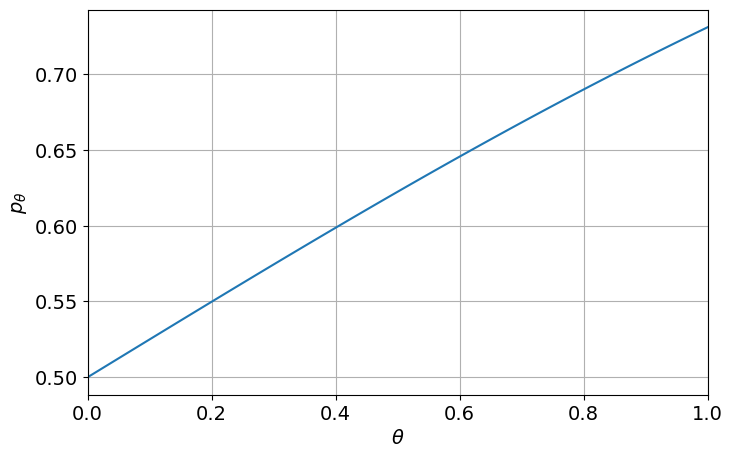

In [40]:
plt.plot(theta_t,ptheta_t)
plt.xlim(0,1);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$p_\theta$');
plt.grid();

<font color="brown">The power $\gamma_s(\theta)$ is the probability that a $\text{Bin}(n,p_{\theta})$ random variable will be greater than $n_{\text{crit}}$:</font>

In [41]:
gammas_t = stats.binom(n,ptheta_t).sf(ncrit)

Verify from your array that $\gamma_s(0)=\alpha$.

In [42]:
gammas_t[0], alpha

(0.08512119752303683, 0.08512119752303683)

<font color="brown">To do a Monte Carlo, we can generate $x^{(I)}_i$ from a standard logisitic distribution.  Then $x^{(I)}_i+\theta$ is a sample from a logisitic distribution with location parameter $\theta$, and $x^{(I)}_i+\theta$ is equivalent to $x^{(I)}_i>-\theta$</font>

In [43]:
Nmonte = 10**4
np.random.seed(20240226)
x_Ii = stats.logistic.rvs(size=(Nmonte,n))

In [44]:
nplus_tI = np.sum(x_Ii[None,:,:] > -theta_t[:,None,None], axis = -1)

In [45]:
gammasMC_t = np.mean(nplus_tI > ncrit, axis=-1)

<font color="brown">We can check that the curves agree pretty well:</font>

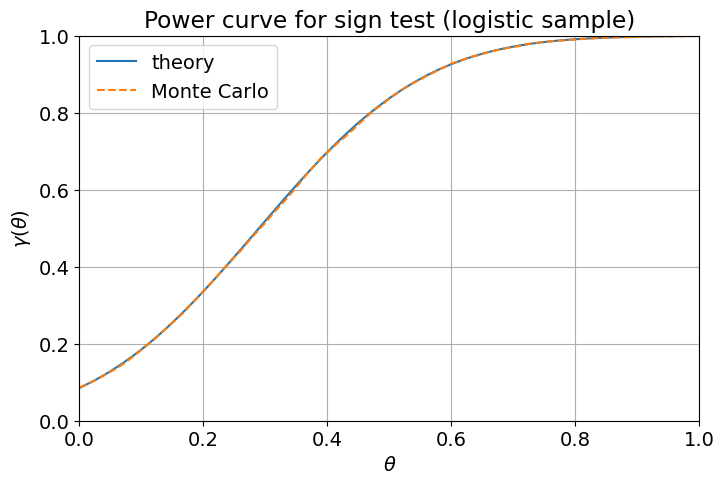

In [46]:
plt.plot(theta_t,gammas_t,ls='-',label='theory');
plt.plot(theta_t,gammasMC_t,ls='--',label='Monte Carlo');
plt.xlim(0,1);
plt.ylim(0,1);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta$)');
plt.title(r'Power curve for sign test (logistic sample)');
plt.grid();
plt.legend();

<font color="brown">and that the Monte Carlo estimate of the significance is pretty close to $\alpha$:</font>

In [47]:
gammasMC_t[0],alpha

(0.0862, 0.08512119752303683)

**(b)** \[6pts\] Using either theoretical calculations or a Monte Carlo simulation, work out the power curve $\gamma_z(\theta)$ for the $z$-test defined in part (c) of problem 2.  (You will plot this below, so store it in an array covering $\theta=0$ to $\theta=1$ at a reasonable density of points.)  Keep in mind that the (known) standard deviation of the distribution is $\sigma=\pi/\sqrt{3}\ne 1$.

<font color="brown">If $E(\color{royalblue}{X_i})=\theta$ and $V(\color{royalblue}{X_i})=\sigma^2$, then $E(\color{royalblue}{\overline{X}})=\theta$ and $V(\color{royalblue}{\overline{X}})=\frac{\sigma^2}{n}$ so $E(\color{royalblue}{Z})=\frac{\theta}{\sigma/\sqrt{n}}$ and $V(\color{royalblue}{Z})=1$.  The Central Limit Theorem says that the statistic will be approximately normal, so we can evaluate $\gamma_z(\theta)=P(\color{royalblue}{Z}>z_{\text{crit}})$:</font>

In [48]:
gammaz_t = stats.norm(loc=theta_t/(sigma/np.sqrt(n))).sf(zcrit)

Verify from your array that $\gamma_z(0)=\alpha$.

In [49]:
gammaz_t[0], alpha

(0.08512119752303682, 0.08512119752303683)

<font color="brown">Alternatively, we can do a Monte Carlo with the $\{x^{(I)}_i\}$ above.  We can calculate the sample means $\{\overline{x}^{(I)}\}$ and then use $\overline{x}^{(I)}+\theta$ as the mean of a corresponding sample from a logistic distribution with location parameter $\theta$.</font>

In [50]:
xbar_I = np.mean(x_Ii,axis=-1)
z_tI = (xbar_I[None,:] + theta_t[:,None])/(sigma/np.sqrt(n))
gammazMC_t = np.mean(z_tI > zcrit, axis=-1)

<font color="brown">We can check that the curves agree pretty well:</font>

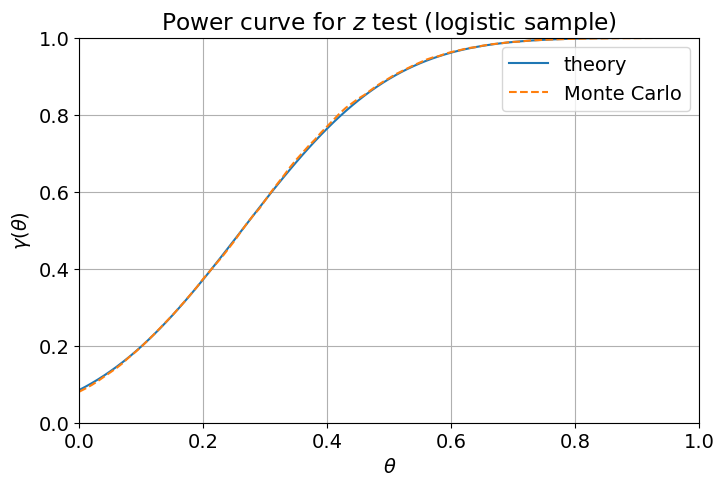

In [51]:
plt.plot(theta_t,gammaz_t,ls='-',label='theory');
plt.plot(theta_t,gammazMC_t,ls='--',label='Monte Carlo');
plt.xlim(0,1);
plt.ylim(0,1);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta$)');
plt.title(r'Power curve for $z$ test (logistic sample)');
plt.grid();
plt.legend();

<font color="brown">and that the Monte Carlo estimate of the significance is pretty close to $\alpha$:</font>

In [52]:
gammazMC_t[0],alpha

(0.0806, 0.08512119752303683)

**(c)** \[5pts\] On the same set of axes, plot $\gamma_s(\theta)$ and $\gamma_z(\theta)$ versus $\theta$.

<font color="brown">We plot the theoretical curves:</font>

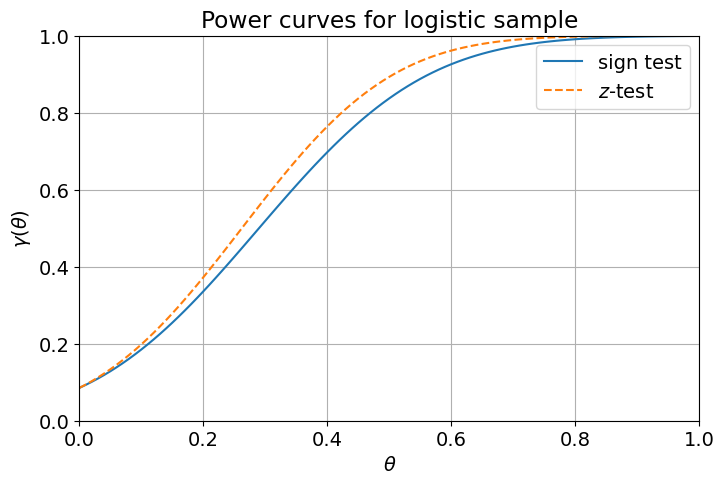

In [53]:
plt.plot(theta_t,gammas_t,ls='-',label='sign test');
plt.plot(theta_t,gammaz_t,ls='--',label=r'$z$-test');
plt.xlim(0,1);
plt.ylim(0,1);
plt.xlabel(r'$\theta$');
plt.ylabel(r'$\gamma(\theta$)');
plt.title(r'Power curves for logistic sample');
plt.grid();
plt.legend();

Compare the power of the two tests; what feature of the sampling distribution might explain their relative power?

<font color="brown">We see that the $z$-test outperforms the sign test, but not by as much as it would if the sample were normal.  The logistic distribution has "heavier tails" than the normal distribution (i.e., large outliers are more likely, which means the bulk of the distribution is narrower if the variance is the same), which makes a robust test like the sign test relatively more powerful.  The situation is, however, less extreme than for the Laplace distribution, for which the sign test is actually more powerful.</font>

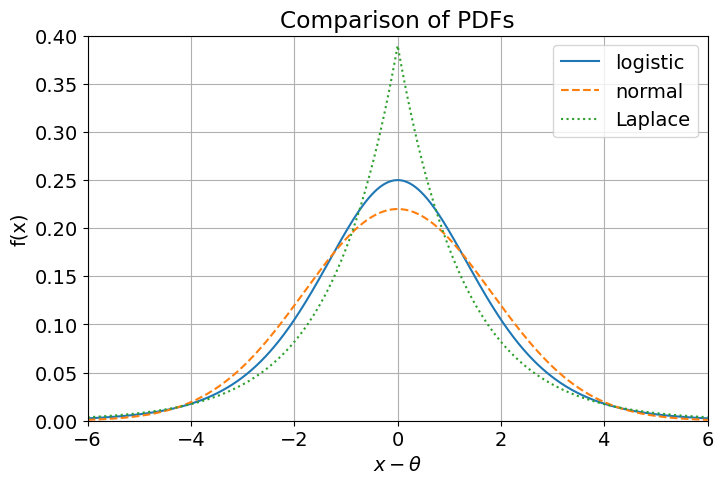

In [54]:
x_x = np.linspace(-6,6,1201)
flog_x = stats.logistic.pdf(x_x)
fnor_x = stats.norm(scale=sigma).pdf(x_x)
flap_x = stats.laplace(scale=sigma/stats.laplace.std()).pdf(x_x)
plt.plot(x_x,flog_x,ls='-',label='logistic');
plt.plot(x_x,fnor_x,ls='--',label='normal');
plt.plot(x_x,flap_x,ls=':',label='Laplace');
plt.xlim(-6,6);
plt.ylim(0,0.4);
plt.grid();
plt.xlabel(r'$x-\theta$');
plt.ylabel(r'f(x)');
plt.title(r'Comparison of PDFs');
plt.legend();

**(d)** \[3pts\] What other test might you use in this situation?  (Just the name is sufficient.)

<font color="brown">The one-sample signed rank test.</font>

<font color="brown">**Exercise**: estimate and plot the power curve for this test in comparison with the other two.</font>